In [40]:
%matplotlib notebook

from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [41]:
# Load the mnist data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<IPython.core.display.Javascript object>


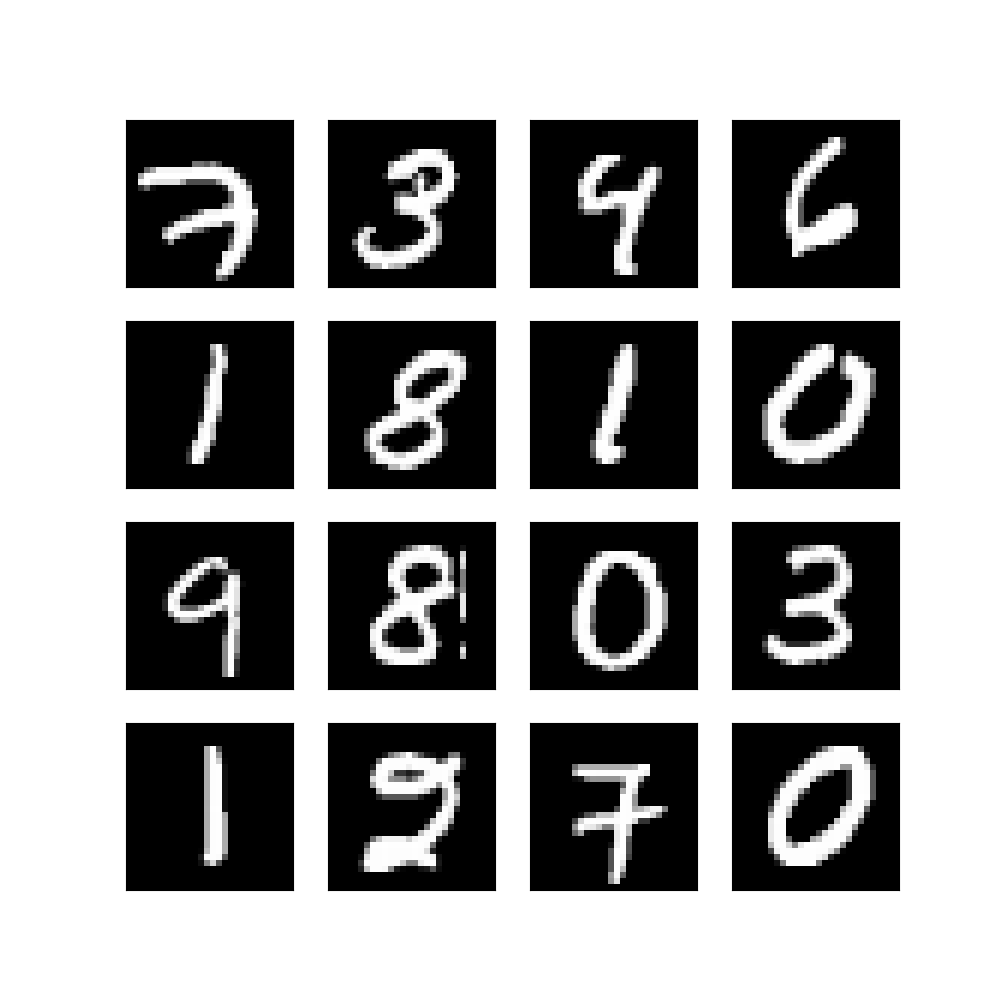

In [42]:
# Let us visualise the first 16 data points from the MNIST training data

fig = plt.figure()
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(mnist.train.images[i].reshape(28, 28), cmap='Greys_r')  
    


In [43]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.05)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)



In [44]:
x = tf.placeholder(tf.float32, shape=[None, 784])
x_ = tf.reshape(x, [-1, 28, 28, 1])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
# Define the first convolution layer here

W_conv1 = weight_variable([12,12,1,25])
# Optional: [14,14,1,25], [15,15,1,25]
b_conv1 = bias_variable([25])
h_conv1 = tf.nn.relu(tf.nn.conv2d(input = x_, filter = W_conv1, strides = (1,2,2,1), padding = 'VALID' ) + b_conv1)


# Define the second convolution layer here
W_conv2 = weight_variable([5,5,25,64])
#Optional: [6,6,25,64] or [10,10,25,64] etc.
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(tf.nn.conv2d(input = h_conv1, filter = W_conv2, strides = (1,1,1,1), padding = 'SAME')+ b_conv2)


# Define maxpooling
h_pool2 = tf.nn.max_pool( value = h_conv2, ksize = (1,2,2,1), strides = (1,2,2,1), padding = 'VALID')
# All subsequent layers will be fully connected ignoring geometry so we'll flatten the layer
# Flatten the h_pool2_layer (as it has a multidimensiona shape) 
h_pool2_flat = tf.nn.relu(tf.reshape(h_pool2,shape = [-1,1024]))

# Define the first fully connected layer here
W_fc1 = weight_variable([1024,1024]) 
b_fc1 = bias_variable([1024])
h_fc1 = tf.matmul(h_pool2_flat,W_fc1)+b_fc1


# Use dropout for this layer (should you wish)
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# The final fully connected layer
W_fc2 = weight_variable([1024,10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop,W_fc2) + b_fc2

In [45]:
# We'll use the cross entropy loss function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))

# And classification accuracy
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# And the Adam optimiser
train_step = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cross_entropy)


In [46]:
# Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(3001):
    batch = mnist.train.next_batch(50)
    if(i%100==0):
        train_acc = sess.run(accuracy, feed_dict = {x: batch[0], y_: batch[1], keep_prob: 0.5})
        print(str(train_acc)+ ' after '+str(i))
    sess.run(train_step, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    
test_acc =sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 0.5})
print ('Test accuracy '+ str(test_acc))


sess.close()

0.1 after 0
0.86 after 100
0.84 after 200
0.98 after 300
0.86 after 400
0.92 after 500
0.98 after 600
0.94 after 700
0.98 after 800
0.96 after 900
0.88 after 1000
0.94 after 1100
0.98 after 1200
0.94 after 1300
1.0 after 1400
0.98 after 1500
0.98 after 1600
0.98 after 1700
0.96 after 1800
1.0 after 1900
1.0 after 2000
0.98 after 2100
0.98 after 2200
1.0 after 2300
1.0 after 2400
0.98 after 2500
0.96 after 2600
0.98 after 2700
0.98 after 2800
1.0 after 2900
0.96 after 3000
Test accuracy 0.9821


<IPython.core.display.Javascript object>


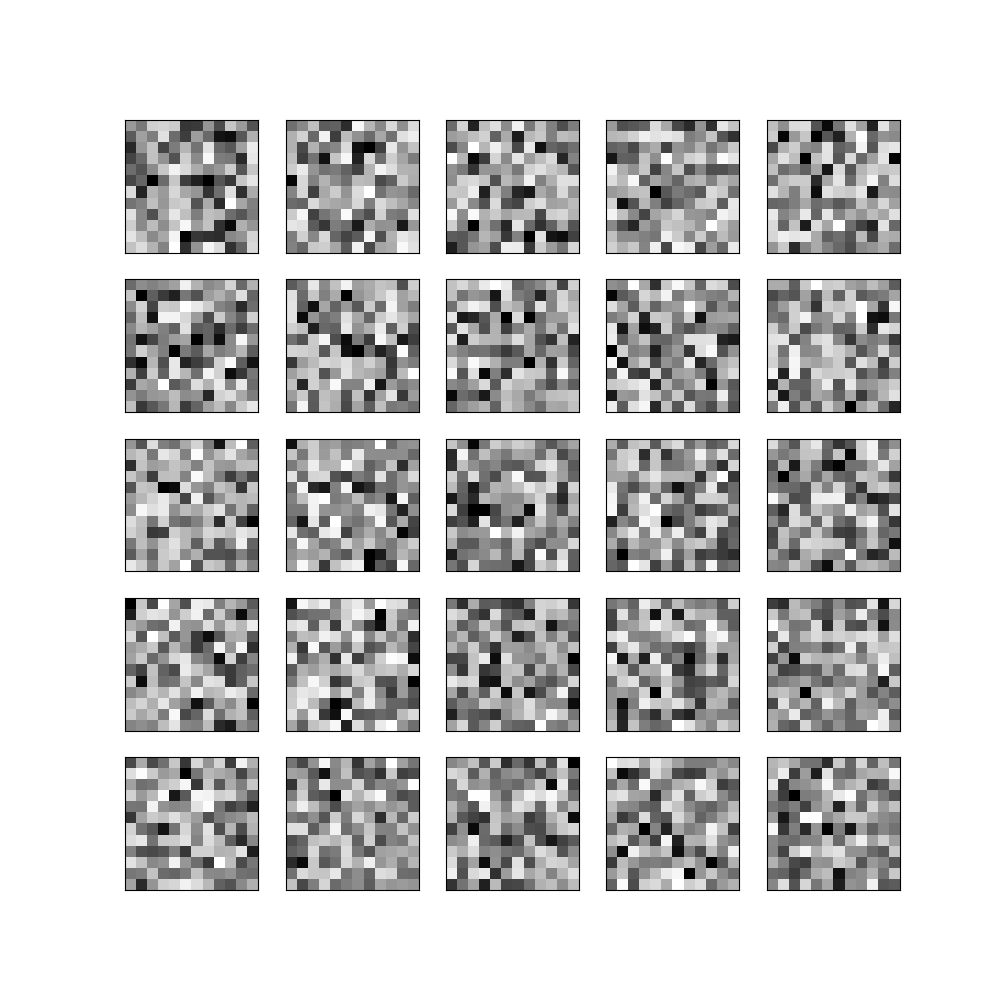

In [30]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
with sess.as_default():
    W = W_conv1.eval()
    fig = plt.figure()
    for i in range(W.shape[3]):
        ax = fig.add_subplot(5, 5, i + 1)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.imshow(W[:,:,0,i] , cmap='Greys_r')  

(10000, 9, 9, 25)


<IPython.core.display.Javascript object>


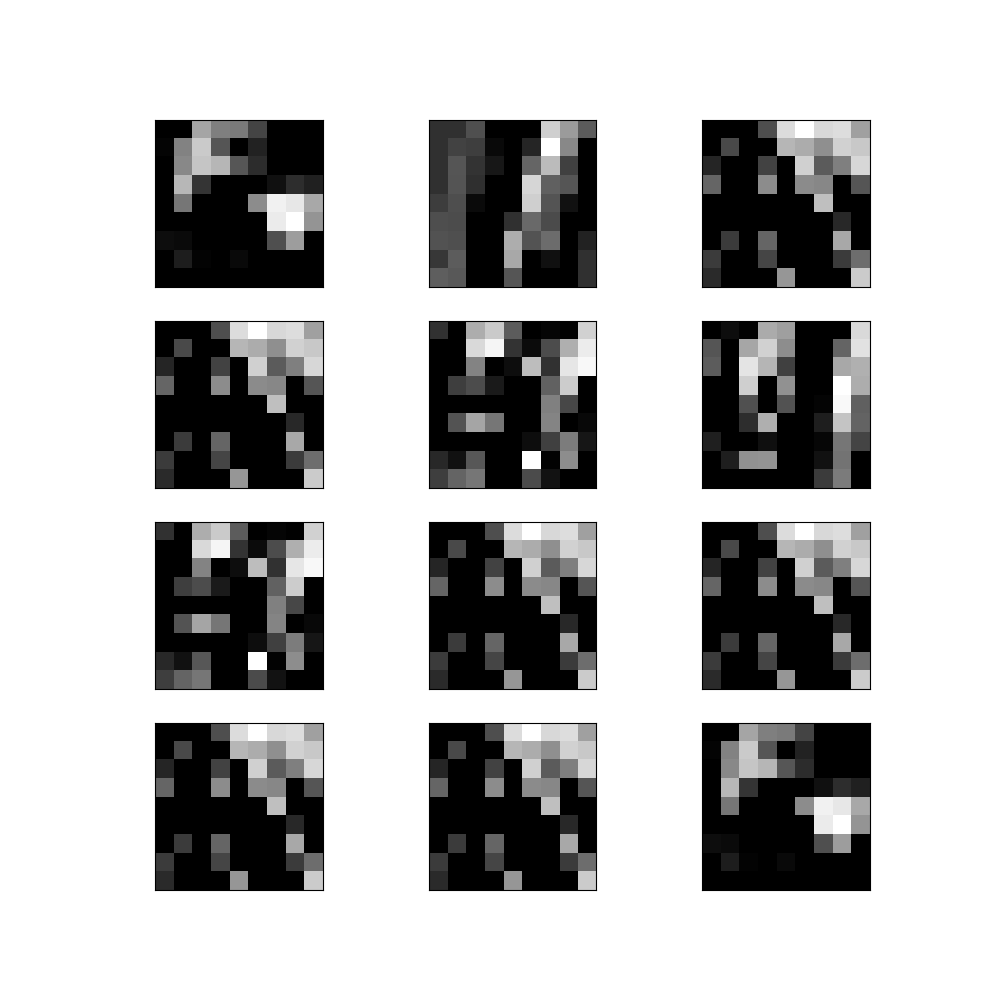

<IPython.core.display.Javascript object>


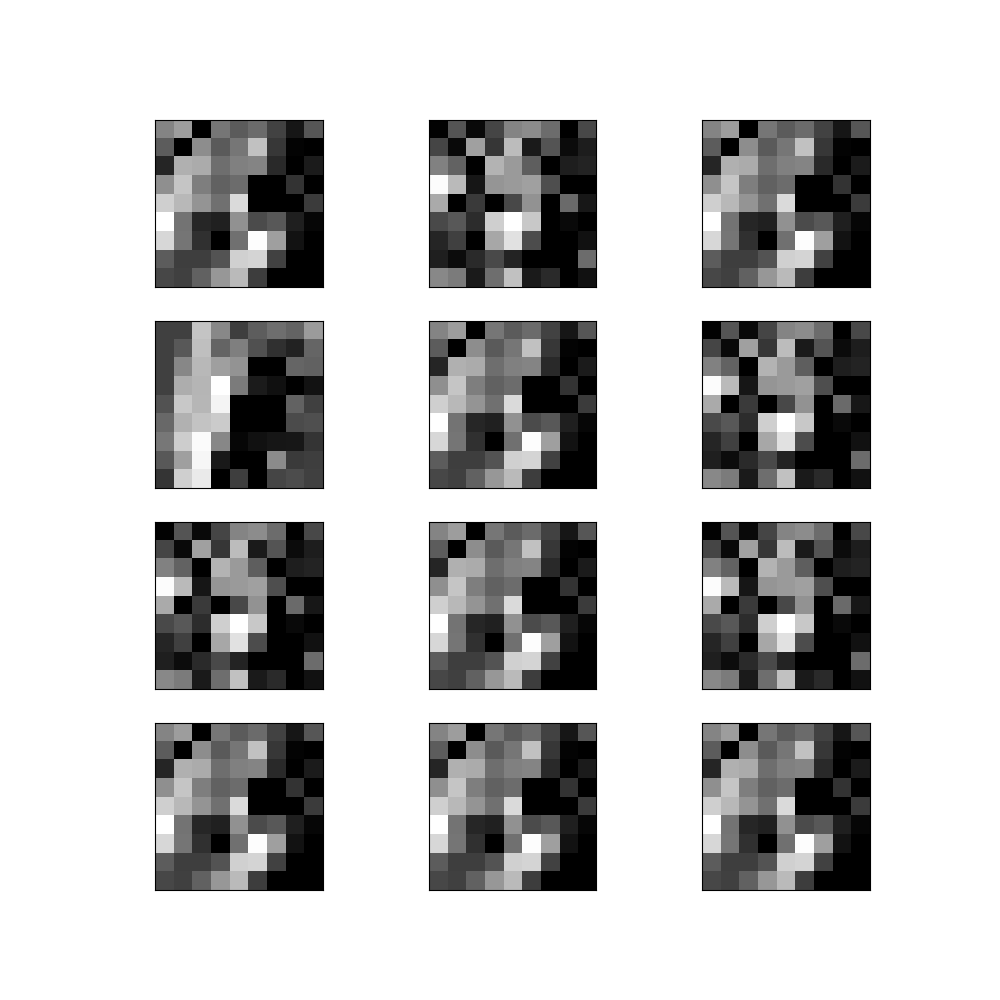

<IPython.core.display.Javascript object>


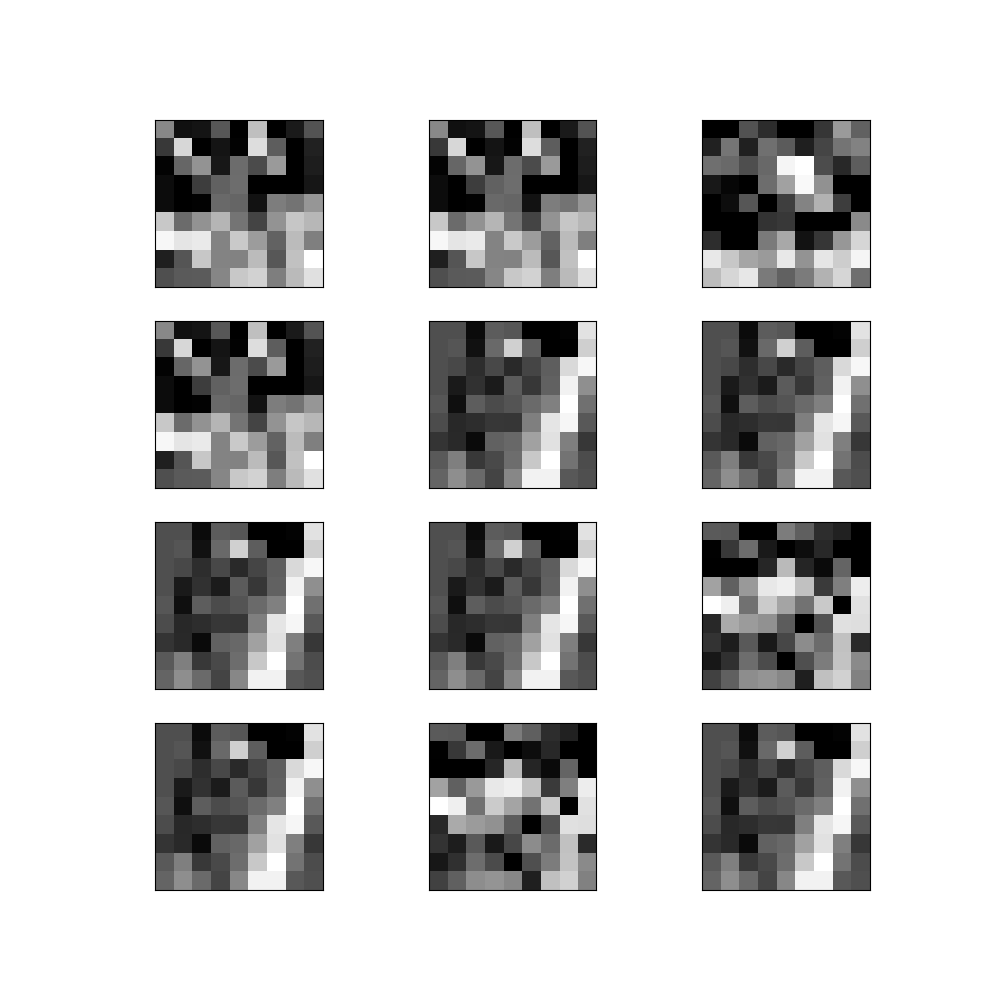

<IPython.core.display.Javascript object>


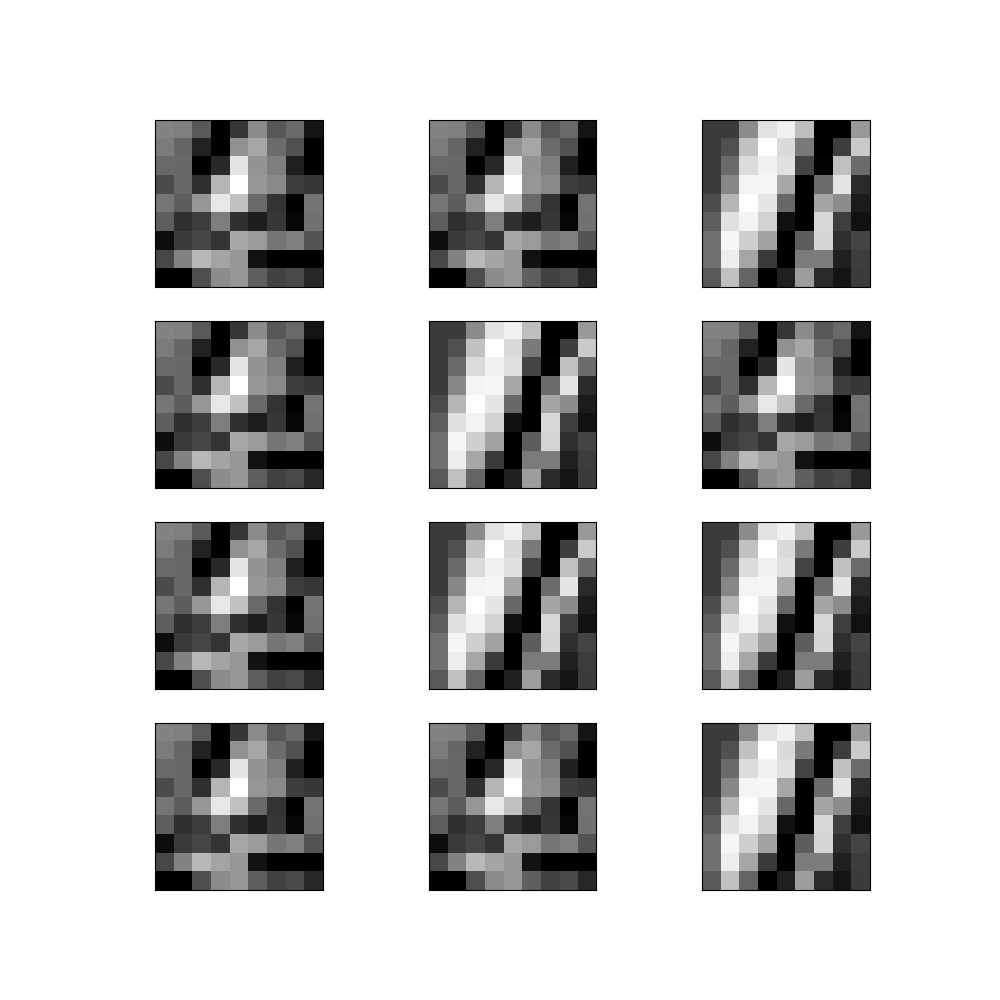

<IPython.core.display.Javascript object>


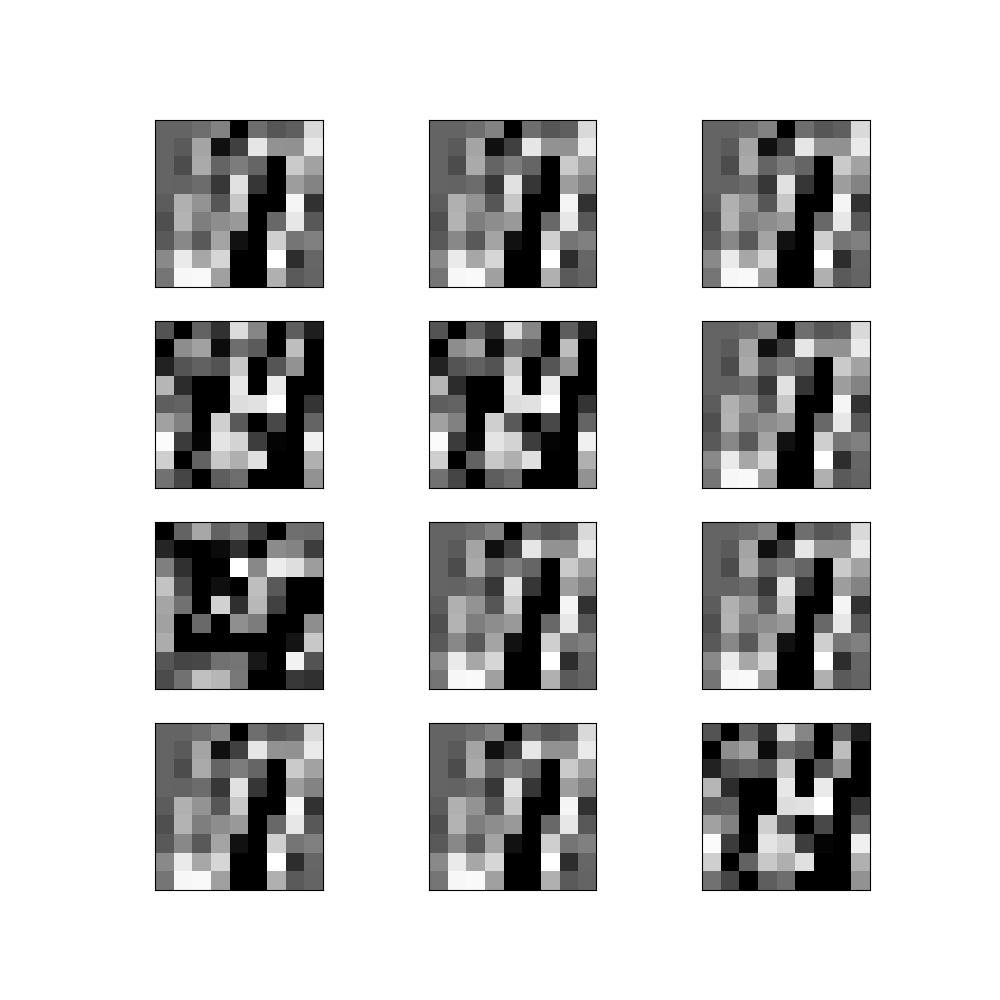

In [35]:
H =  sess.run(h_conv1, feed_dict={x: mnist.test.images})
#H = H[:,:,:,20]

sh = H.shape
print(sh)
for j in range(0,5):
    Hj = H[:,:,:,j]
    sh = Hj.shape
    top_patches = np.argsort(Hj, axis = None)[-12:]
    coordinates = np.unravel_index(top_patches, sh)
    fig = plt.figure()  
    for i in range(12):
        ax = fig.add_subplot(4, 3, i + 1)
        ax.set_xticks(())
        ax.set_yticks(())
        image = coordinates[2][i]
        ax.imshow(Hj[image,:,:] , cmap='Greys_r')  
        
sess.close()

# Add code to visualise patches in the test set that find the most result in 
# the highest activations for filters 0, ... 4